# Clustering 



# Question 3: Uncle Steve's Credit Union

## Instructions

Uncle Steve has recently opened a new credit union in Kingston, named *Uncle Steve's Credit Union*. He plans to disrupt the local market by instaneously providing credit to customers.

The first step in Uncle Steve's master plan is to create a model to predict whether an application has *good risk* or *bad risk*. He has outsourced the creation of this model to you.

You are to create a classification model to predict whether a loan applicant has good risk or bad risk. You will use data  that Uncle Steve bought from another credit union (somewhere in Europe, he thinks?) that has around 6000 instances and a number of demographics features (e.g., `Sex`, `DateOfBirth`, `Married`), loan details (e.g., `Amount`, `Purpose`), credit history (e.g., number of loans), as well as an indicator (called `BadCredit` in the dataset) as to whether that person was a bad risk.


**Your tasks**

To examine the effects of the various ML stages, you are to create the model several times, each time adding more sophistication, and measuring how much the model improved (or not). In particular, you will:

0. Split the data in training and testing. Don't touch the testing data again, for any reason, until step 5. We are pretending that the testing data is "future, unseen data that our model won't see until production." I'm serious, don't touch it. I'm watching you!
1. Build a baseline model - no feature engineering, no feature selection, no hyperparameter tuning (just use the default settings), nothing fancy. (You may need to do some basic feature transformations, e.g., encoding of categorical features, or dropping of features you do not think will help or do not want to deal with yet.) Measure the performance using K-fold cross validation (recommended: [`sklearn.model_selection.cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score)) on the training data. Use at least 5 folds, but more are better. Choose a [`scoring` parameter](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) (i.e., classification metric) that you feel is appropriate for this task. Don't use accuracy. Print the mean score of your model.
2. Add a bit of feature engineering. The [`sklearn.preprocessing`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) module contains many useful transformations. Engineer at least three new features. They don't need to be especially ground-breaking or complicated. Dimensionality reduction techniques like [`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) are fair game but not required. (If you do use dimensionality reduction techniques, it would only count as "one" new feature for the purposes of this assignment, even though I realize that PCA creates many new "features" (i.e., principal componentns).) Re-train your baseline model. Measure performance. Compare to step 1.
3. Add feature selection. The [`sklearn.feature_selection`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection) has some algorithms for you to choose from. After selecting features, re-train your model, measure performance, and compare to step 2.
4. Add hyperparameter tuning. Make reasonable choices and try to find the best (or at least, better) hyperparameters for your estimator and/or transformers. It's probably a good idea to stop using `cross_val_score` at this point and start using [`sklearn.model_selection.GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) as it is specifically built for this purpose and is more convienient to use. Measure performance and compare to step 3.
5. Finally, estimate how well your model will work in production. Use the testing data (our "future, unseen data") from step 0. Transform the data as appropriate (easy if you've built a pipeline, a little more difficult if not), use the model from step 4 to get predictions, and measure the performance. How well did we do? 


**Marking**

Each part will be marked for:
- *Correctness*. Code clearly and fully performs the task specified.
- *Reproducibility*. Code is fully reproducible. I.e., you (and I) should be able to run this Notebook again and again, from top to bottom, and get the same results each and every time.
- *Style*. Code is organized. All parts commented with clear reasoning and rationale. No old code laying around. Code easy to follow. 


**Tips**
- The origins of the dataset are a bit of a mystery. Assume the data set is recent (circa 2021) and up-to-date. Assume that column names are correct and accurate.
- You don't need to experiment with more than one algorithm/estimator. Just choose one (e.g., [`sklearn.tree.DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier), [`sklearn.ensemble.RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier), [`sklearn.linear_model.LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression), [`sklearn.svm.LinearSVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC), whatever) and stick with it for this question. 
- There is no minimum accuracy/precision/recall for this question. I.e., your mark will not be based on how good your model is. Rather, you mark will be based on good your process is.
- Watch out for data leakage and overfitting. In particular, be sure to `fit()` any estimators and transformers (collectively, *objects*) only to the training data, and then use the objects' `transform()` methods on both the training and testing data. [Data School](https://www.youtube.com/c/dataschool/featured) has a [helpful video](https://www.youtube.com/watch?v=g2XsZdwbCCs) about this. [Pipelines](https://www.youtube.com/watch?v=1Y6O9nCo0-I) are very helpful here and make your code shorter and more robust (at the expense of making it harder to understand), and I recommend using them, but they are not required for this assignment.
- Create as many code cells as you need. In general, each cell should do one "thing."
-	Don't print large volumes of output. E.g., don't do: `df.head(100)`




## 3.0: Load data and split

In [ ]:
# DO NOT MODIFY THIS CELL

# First, we'll read the provided labeled training data
df3 = pd.read_csv("https://drive.google.com/uc?export=download&id=1wOhyCnvGeY4jplxI8lZ-bbYN3zLtickf")
df3.info()

from sklearn.model_selection import train_test_split

X = df3.drop('BadCredit', axis=1) #.select_dtypes(['number'])
y = df3['BadCredit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   UserID             6000 non-null   object
 1   Sex                6000 non-null   object
 2   PreviousDefault    6000 non-null   int64 
 3   FirstName          6000 non-null   object
 4   LastName           6000 non-null   object
 5   NumberPets         6000 non-null   int64 
 6   PreviousAccounts   6000 non-null   int64 
 7   ResidenceDuration  6000 non-null   int64 
 8   Street             6000 non-null   object
 9   LicensePlate       6000 non-null   object
 10  BadCredit          6000 non-null   int64 
 11  Amount             6000 non-null   int64 
 12  Married            6000 non-null   int64 
 13  Duration           6000 non-null   int64 
 14  City               6000 non-null   object
 15  Purpose            6000 non-null   object
 16  DateOfBirth        6000 non-null   object


In [ ]:
#********************************************************************************************************************************************************************************
#Doing Basic Checks
#********************************************************************************************************************************************************************************
print(df3);print(X_train);print(y_train)

           UserID Sex  PreviousDefault  ...              City    Purpose  DateOfBirth
0     218-84-8180   F                0  ...        Port Keith   Vacation   1964-04-07
1     395-49-9764   M                0  ...        Lake Debra     NewCar   1978-06-02
2     892-81-4890   F                0  ...  North Judithbury     NewCar   1972-03-18
3     081-11-7963   F                0  ...         Lake Chad      Other   1985-02-26
4     347-03-9639   M                0  ...  North Judithbury   Vacation   1983-08-08
...           ...  ..              ...  ...               ...        ...          ...
5995  290-91-5587   F                0  ...    East Jessetown     Repair   1968-08-25
5996  137-27-2025   M                0  ...          Lisatown     NewCar   1969-08-15
5997  061-50-0051   M                0  ...    New Roberttown  Education   1977-04-12
5998  239-62-7143   M                0  ...  North Judithbury     NewCar   1966-06-12
5999  367-72-7571   F                0  ...  North Jud

In [ ]:
#********************************************************************************************************************************************************************************
#Checking for Null values
#********************************************************************************************************************************************************************************

X_train.isna().sum()

UserID               0
Sex                  0
PreviousDefault      0
FirstName            0
LastName             0
NumberPets           0
PreviousAccounts     0
ResidenceDuration    0
Street               0
LicensePlate         0
Amount               0
Married              0
Duration             0
City                 0
Purpose              0
DateOfBirth          0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


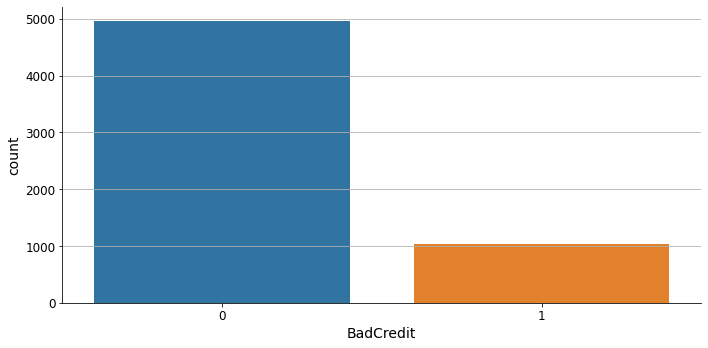

In [ ]:
#********************************************************************************************************************************************************************************
#Visualizing Target variable
#********************************************************************************************************************************************************************************

sns.factorplot('BadCredit', data=df3, aspect=2, kind='count');

In [ ]:
#********************************************************************************************************************************************************************************
#Checking Feature size
#********************************************************************************************************************************************************************************

for i in X_train.columns:
    print('{} - {}'.format(i,X_train[i].unique().shape[0]))

UserID - 4800
Sex - 2
PreviousDefault - 2
FirstName - 568
LastName - 907
NumberPets - 3
PreviousAccounts - 7
ResidenceDuration - 10
Street - 4800
LicensePlate - 4799
Amount - 1641
Married - 2
Duration - 6
City - 20
Purpose - 8
DateOfBirth - 3570


In [ ]:
#********************************************************************************************************************************************************************************
#Checking for duplicate rows
#********************************************************************************************************************************************************************************

bool_series = X_train.duplicated(keep=False)
print('Boolean series:')
print(bool_series.value_counts())
print('\n')
print('DataFrame after removing all the instances of the duplicate rows:')
X_train[~bool_series]

Boolean series:
False    4800
dtype: int64


DataFrame after removing all the instances of the duplicate rows:


,UserID,Sex,PreviousDefault,FirstName,LastName,NumberPets,PreviousAccounts,ResidenceDuration,Street,LicensePlate,Amount,Married,Duration,City,Purpose,DateOfBirth
3897,236-22-6766,M,0,Jerry,Black,2,0,2,0466 Brown Wall,3-U8282,3329,0,12,New Roberttown,Household,1970-04-22
5628,766-20-5986,F,0,Julia,Jones,0,2,2,6095 Larson Causeway,LWO 912,2996,0,36,Ericmouth,Household,1964-06-19
1756,744-25-5747,F,0,Abigail,Estrada,2,0,3,293 Michael Divide,715 OQT,2470,0,24,East Jill,NewCar,1975-02-17
2346,463-78-3098,F,0,Jessica,Jones,2,1,2,02759 Williams Roads,869 SYK,3745,0,30,Lake Debra,UsedCar,1977-02-16
2996,414-44-6527,M,0,William,Shaffer,0,1,3,19797 Turner Rue,48-A601,3549,0,36,North Judithbury,Vacation,1976-07-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,888-92-1021,F,0,Carly,Tanner,0,1,1,99179 Erin Stravenue,98G XY9,3607,1,24,Robinsonshire,NewCar,1973-01-04
5191,875-64-1301,F,0,Jasmine,Chambers,2,1,0,368 Jackson Pass Suite 887,430M,3186,0,30,North Judithbury,NewCar,1973-12-25
5226,584-74-0175,F,0,Danielle,Hendrix,2,1,3,898 Kayla Manor Apt. 879,293 MHY,2387,1,36,Lake Roberto,Business,1969-02-25
5390,507-44-5910,F,0,Dana,Taylor,1,1,3,7343 Kimberly Flat,4JIY 37,3620,0,12,Lake Debra,Other,1967-01-09


In [ ]:
#********************************************************************************************************************************************************************************
#Checking Feature data types
#********************************************************************************************************************************************************************************

X_train.dtypes

UserID               object
Sex                  object
PreviousDefault       int64
FirstName            object
LastName             object
NumberPets            int64
PreviousAccounts      int64
ResidenceDuration     int64
Street               object
LicensePlate         object
Amount                int64
Married               int64
Duration              int64
City                 object
Purpose              object
DateOfBirth          object
dtype: object

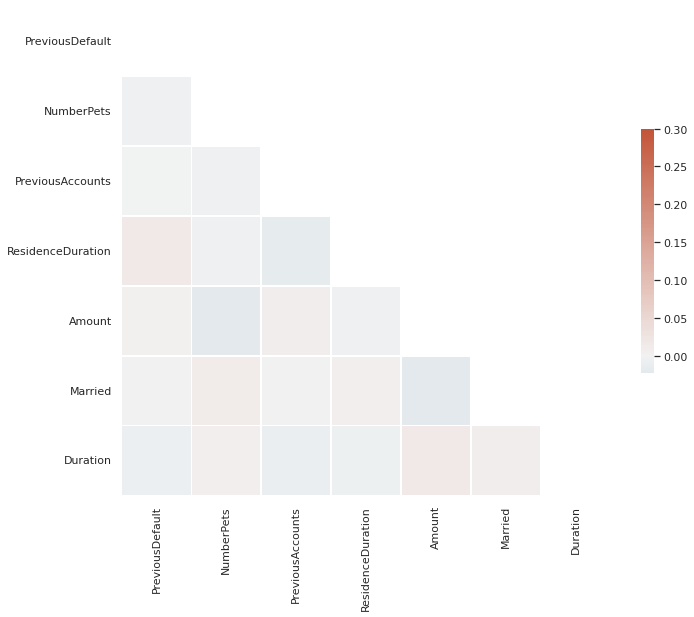

In [ ]:
from string import ascii_letters
#********************************************************************************************************************************************************************************
# Plotting Correlation
#********************************************************************************************************************************************************************************

sns.set_theme(style="white")

# Generate a large random dataset
rs = np.random.RandomState(80)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = X_train.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
#********************************************************************************************************************************************************************************
#Dropping variables with high unique values
#********************************************************************************************************************************************************************************
temp = X_train.drop(labels=['UserID', 'Street', 'LicensePlate','FirstName','LastName'], axis=1)


In [ ]:
#********************************************************************************************************************************************************************************
#Checking for high cardinality features
#********************************************************************************************************************************************************************************

feat = [x for x in X_train.columns]
for col in feat:
  print(X_train.groupby([col]).size())

UserID
001-06-1660    1
001-15-0532    1
001-43-3197    1
001-49-1846    1
001-54-6440    1
              ..
898-85-3368    1
899-04-0153    1
899-39-3800    1
899-69-3449    1
899-87-9592    1
Length: 4800, dtype: int64
Sex
F    3338
M    1462
dtype: int64
PreviousDefault
0    4703
1      97
dtype: int64
FirstName
Aaron       9
Abigail    10
Adam       14
Adrian      1
Adriana     1
           ..
Yesenia     1
Yolanda     2
Yvette      1
Yvonne      5
Zachary     2
Length: 568, dtype: int64
LastName
Abbott       3
Acevedo      2
Acosta       1
Adams        8
Adkins       3
            ..
Zamora       2
Zavala       1
Zhang        2
Zimmerman    4
Zuniga       4
Length: 907, dtype: int64
NumberPets
0    1552
1    1596
2    1652
dtype: int64
PreviousAccounts
0    1741
1    1822
2     837
3     301
4      76
5      16
6       7
dtype: int64
ResidenceDuration
0     641
1    1317
2    1287
3     886
4     441
5     155
6      49
7      19
8       4
9       1
dtype: int64
Street
000 Frazier

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


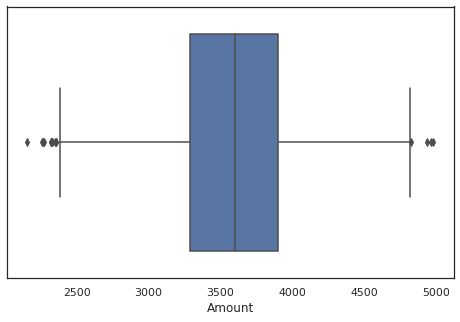

In [ ]:
#********************************************************************************************************************************************************************************
#Plotting to check outliers in Amount feature
#********************************************************************************************************************************************************************************
sns.boxplot(X_train.Amount)

In [ ]:
#********************************************************************************************************************************************************************************
#Converting all objects to category dtype
#********************************************************************************************************************************************************************************

for x in temp.columns:
  if temp[x].dtype == 'object':
    temp[x]= temp[x].astype('category')


In [ ]:
#********************************************************************************************************************************************************************************
#Applying target encoding to convert category features to numeric
#********************************************************************************************************************************************************************************

y_b_train = pd.to_numeric(y_train)
!pip install category_encoders
from category_encoders import TargetEncoder

te = TargetEncoder()

def target_encoder(col, target):
    for i in range(len(temp.columns)):
        col.iloc[:,i] = te.fit_transform(col, target)
    return col

df_te_train = target_encoder(temp, y_train)

     |████████████████████████████████| 82 kB 353 kB/s 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 3.1: Baseline model

In [ ]:
#********************************************************************************************************************************************************************************
# Building Baseline RFM model 
#********************************************************************************************************************************************************************************
classifiers = {"RandomForest" : RandomForestClassifier()}

In [ ]:
#********************************************************************************************************************************************************************************
# Calculating CV score
#********************************************************************************************************************************************************************************

train_cross_scores = []
test_cross_scores = []

for key, classifier in classifiers.items():
    classifier.fit(df_te_train, y_train)
    train_score = cross_val_score(classifier, df_te_train, y_train, cv=5,scoring='f1_weighted')
    train_cross_scores.append(round(train_score.mean(),2))
  
    
print(train_cross_scores)

RandomForestClassifier()

[0.86]


Our Baseline model F1 Weighted Score is 0.86

## 3.2: Feature engineering

In [ ]:
#********************************************************************************************************************************************************************************
#Feature engineering 
#********************************************************************************************************************************************************************************
#Split the date of birth feature to 3 seperate features
from datetime import datetime
X_train.DateOfBirth = pd.to_datetime(X_train.DateOfBirth, format='%Y-%m-%d')
X_train['year']  = X_train.DateOfBirth.dt.year
X_train['month'] = X_train.DateOfBirth.dt.month
X_train['day'] = X_train.DateOfBirth.dt.day

#Create a function for Age
def Age(data):
  now = datetime.now().year
  data['Age'] = now- data['year']
  data['Age']=data['Age'].replace([2021],0)
  return data

#Encode the Age feature 
X_train= Age(X_train)
X_train['DateOfBirth']=X_train['DateOfBirth'].apply(lambda x: x.toordinal())

X_train.dtypes

UserID               object
Sex                  object
PreviousDefault       int64
FirstName            object
LastName             object
NumberPets            int64
PreviousAccounts      int64
ResidenceDuration     int64
Street               object
LicensePlate         object
Amount                int64
Married               int64
Duration              int64
City                 object
Purpose              object
DateOfBirth           int64
year                  int64
month                 int64
day                   int64
Age                   int64
dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


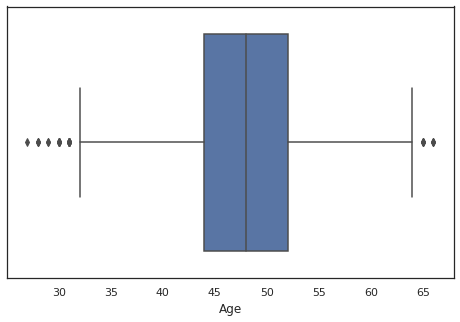

In [ ]:
#********************************************************************************************************************************************************************************
# Visualizing Age feature to identify outliers
#********************************************************************************************************************************************************************************

sns.boxplot(X_train.Age)

In [ ]:
#********************************************************************************************************************************************************************************
# Merging target and label to handle outliers
#********************************************************************************************************************************************************************************

train_df = pd.concat([X_train,y_train],axis=1)


In [ ]:
def remove_outlier(col):
    q25 = col.quantile(0.25)
    q75 = col.quantile(0.75)
    iqr = q75 - q25
    cutoff = iqr*1.5
    lower = q25 - cutoff
    upper = q75 + cutoff
    return lower, upper

lower, upper = remove_outlier(train_df.Amount)
train_df = train_df.loc[(train_df.Amount > lower) & (train_df.Amount < upper)]
lower1, upper1 = remove_outlier(train_df.Age)
train_df = train_df.loc[(train_df.Age > lower1) & (train_df.Age < upper1)]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


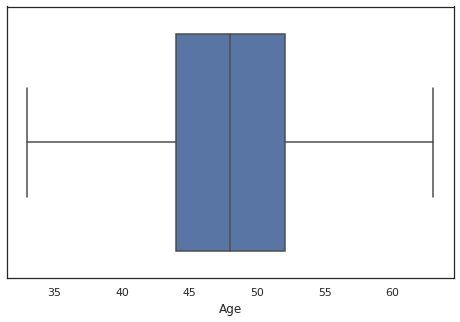

In [ ]:
#********************************************************************************************************************************************************************************
#Visualizing Age feature to check if outliers are removed
#********************************************************************************************************************************************************************************

sns.boxplot(train_df.Age)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


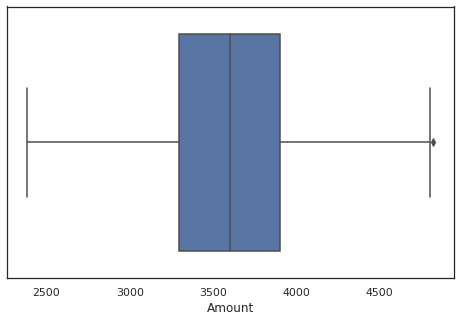

In [ ]:
#********************************************************************************************************************************************************************************
#Visualizing Amount feature to check if outliers are removed
#********************************************************************************************************************************************************************************
sns.boxplot(train_df.Amount)


(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f20b6594590>)

Text(0.5, 1.0, 'UserID')

Text(0.5, 1.0, 'Sex')

Text(0.5, 1.0, 'PreviousDefault')

Text(0.5, 1.0, 'FirstName')

Text(0.5, 1.0, 'LastName')

Text(0.5, 1.0, 'NumberPets')

Text(0.5, 1.0, 'PreviousAccounts')

Text(0.5, 1.0, 'ResidenceDuration')

Text(0.5, 1.0, 'Street')

Text(0.5, 1.0, 'LicensePlate')

Text(0.5, 1.0, 'Amount')

Text(0.5, 1.0, 'Married')

Text(0.5, 1.0, 'Duration')

Text(0.5, 1.0, 'City')

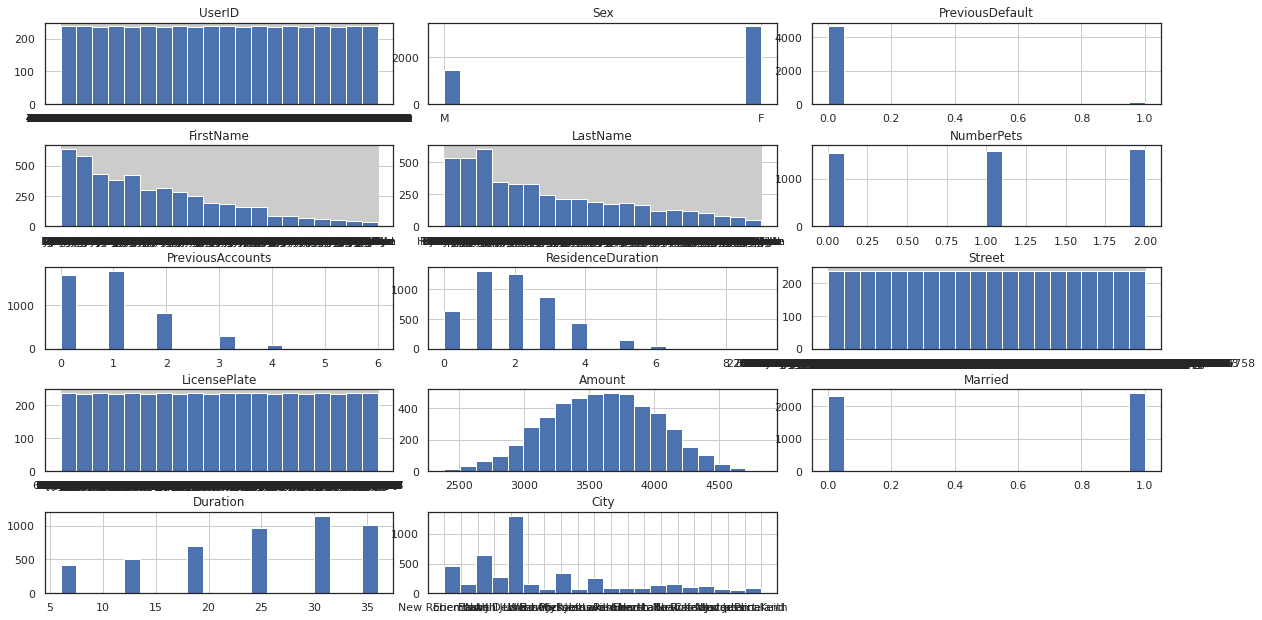

In [ ]:
#********************************************************************************************************************************************************************************
#More plots to understand about the feature distributions
#********************************************************************************************************************************************************************************

col = train_df.columns[:14]
plt.subplots(figsize = (20, 15))
length = len(col)

for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot((length/2), 3, j + 1)
    plt.subplots_adjust(wspace = 0.1,hspace = 0.5)
    train_df[i].hist(bins = 20)
    plt.title(i)
plt.show()

In [ ]:
#********************************************************************************************************************************************************************************
#More feature engineering
#********************************************************************************************************************************************************************************

train_df['age_binned'] = pd.qcut(train_df.Age, q=[0, .25, .50, .75, 1])
train_df['amt_binned'] = pd.qcut(train_df.Amount, q=[0, .25, .50, .75, 1])
train_df['year_binned'] = pd.qcut(train_df.year, q=[0, .25, .50, .75, 1])
train_df['day_binned'] = pd.qcut(train_df.day, q=[0, .25, .50, .75, 1])
train_df['month_binned'] = pd.qcut(train_df.month, q=[0, .25, .50, .75, 1])


In [ ]:
#********************************************************************************************************************************************************************************
#Dropping the original feaures causing duplication
#********************************************************************************************************************************************************************************
train_df.drop(columns=['Age', 'Amount', 'year','day','month'], inplace=True)

In [ ]:
#********************************************************************************************************************************************************************************
#Label Encoding for the created features
#********************************************************************************************************************************************************************************
le=LabelEncoder()
train_df['Age']= le.fit_transform(train_df['age_binned'])
train_df['amount']= le.fit_transform(train_df['amt_binned'])
train_df['year']= le.fit_transform(train_df['year_binned'])
train_df['day']= le.fit_transform(train_df['day_binned'])
train_df['month']= le.fit_transform(train_df['month_binned'])

In [ ]:
#********************************************************************************************************************************************************************************
#Dropping the duplicate columns
#********************************************************************************************************************************************************************************
train_df.drop(columns=['age_binned','amt_binned','year_binned','day_binned','month_binned'],inplace=True)

In [ ]:
#********************************************************************************************************************************************************************************
#Splitting the target variable
#********************************************************************************************************************************************************************************
x_train = train_df.loc[:, train_df.columns != 'BadCredit']
ytrain = train_df.loc[:, train_df.columns == 'BadCredit']

In [ ]:
#********************************************************************************************************************************************************************************
#Converting it to Dataframe
#********************************************************************************************************************************************************************************
x_train = pd.DataFrame(x_train)
ytrain = pd.DataFrame(ytrain)

In [ ]:
le=LabelEncoder()
x_train['Sex']= le.fit_transform(x_train['Sex'])
x_train['City']= le.fit_transform(x_train['City'])
x_train['Purpose']= le.fit_transform(x_train['Purpose'])
x_train['Street']= le.fit_transform(x_train['Street'])


In [ ]:
#********************************************************************************************************************************************************************************
#Dropping the features that have larger unique value
#********************************************************************************************************************************************************************************
x_train.drop(columns=['UserID','FirstName','LastName','NumberPets','LicensePlate'],inplace=True)

In [ ]:
#********************************************************************************************************************************************************************************
#Standardize features
#********************************************************************************************************************************************************************************
Scaled = pd.DataFrame(RobustScaler().fit_transform(x_train), columns=x_train.columns)
Scaled

,Sex,PreviousDefault,PreviousAccounts,ResidenceDuration,Street,Married,Duration,City,Purpose,DateOfBirth,Age,amount,year,day,month
0,1.0,0.0,-0.5,0.0,-0.906574,-1.0,-1.0,0.0,-0.666667,-0.428977,0.5,0.0,0.0,0.5,-0.5
1,0.0,0.0,0.5,0.0,0.202706,-1.0,1.0,-0.9,-0.666667,-1.185494,1.0,-0.8,-0.5,0.5,0.0
2,0.0,0.0,-0.5,0.5,-0.417459,-1.0,0.0,-1.0,-0.333333,0.195957,0.0,-0.8,0.5,0.5,-0.5
3,0.0,0.0,0.0,0.0,-0.940816,-1.0,0.5,-0.5,0.666667,0.454868,-0.5,0.8,0.5,0.0,-0.5
4,1.0,0.0,0.0,0.5,-0.616572,-1.0,1.0,0.1,1.000000,0.382515,0.0,0.0,0.5,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4727,0.0,0.0,0.0,-0.5,0.981822,0.0,0.0,0.6,-0.333333,-0.078560,0.0,0.8,0.0,-0.5,-0.5
4728,0.0,0.0,0.0,-1.0,-0.274572,-1.0,0.5,0.1,-0.333333,0.047349,0.0,-0.8,0.0,1.0,1.0
4729,0.0,0.0,0.0,0.5,0.801733,0.0,1.0,-0.4,-1.333333,-0.578294,0.5,-0.8,-0.5,1.0,-0.5
4730,0.0,0.0,0.0,0.5,0.469034,-1.0,-1.0,-0.5,0.000000,-0.854229,1.0,0.8,-0.5,0.0,-0.5


In [ ]:
yScaled = pd.DataFrame(RobustScaler().fit_transform(ytrain), columns=ytrain.columns)

In [ ]:
#********************************************************************************************************************************************************************************
#Checking if the target variable is balanced
#********************************************************************************************************************************************************************************

a_target_0 = ytrain[ytrain.BadCredit == 0].BadCredit.count() / ytrain.BadCredit.count()
a_target_1 = ytrain[ytrain.BadCredit == 1].BadCredit.count() / ytrain.BadCredit.count()

print(a_target_0)
print(a_target_1)

0.8328402366863905
0.16715976331360946


In [ ]:
#********************************************************************************************************************************************************************************
#Splitting the target variable
#********************************************************************************************************************************************************************************
a = Scaled.loc[:, Scaled.columns != 'BadCredit']
b = yScaled

In [ ]:
#********************************************************************************************************************************************************************************
#Applying OverSample technique to handle the imbalance
#********************************************************************************************************************************************************************************
oversample = SMOTE()
a_over,b_over = oversample.fit_resample(a,b)

In [ ]:
#********************************************************************************************************************************************************************************
#Checking if the dataset is balanced
#********************************************************************************************************************************************************************************
a_target_0 = b_over[b_over.BadCredit == 0].BadCredit.count() / b_over.BadCredit.count()
a_target_1 = b_over[b_over.BadCredit == 1].BadCredit.count() / b_over.BadCredit.count()

print(a_target_0)
print(a_target_1)

0.5
0.5


Sex                -0.017923
PreviousAccounts   -0.010159
Street             -0.003535
month              -0.000411
City                0.008203
Duration            0.087318
year                0.589924
DateOfBirth         0.603015
amount              0.607988
BadCredit           1.000000
Name: BadCredit, dtype: float64


<Figure size 1440x1440 with 0 Axes>

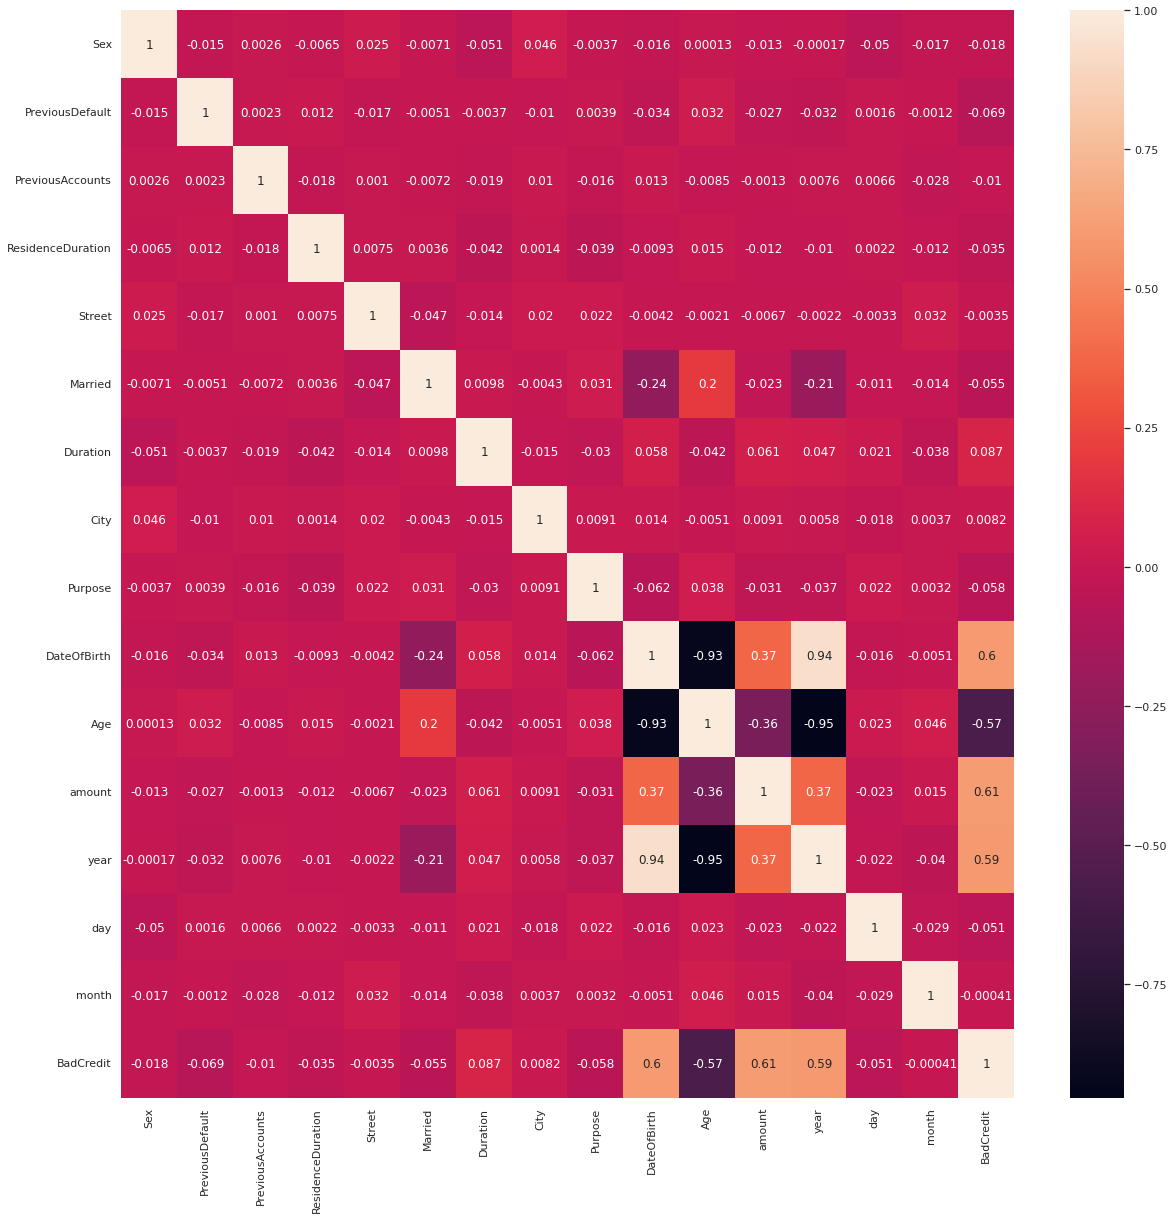

In [ ]:
#********************************************************************************************************************************************************************************
# Visualizing Correlation map
#********************************************************************************************************************************************************************************
train = pd.concat([a_over,b_over],axis=1)
cm_b = train.corr()

print(cm_b.BadCredit.sort_values().tail(10))

plt.figure(figsize=(20,20))
sns.heatmap(cm_b, xticklabels=train.columns, yticklabels=train.columns,annot=True)

In [ ]:
#********************************************************************************************************************************************************************************
#Checking CV Score
#********************************************************************************************************************************************************************************
train_cross_scores = []

for key, classifier in classifiers.items():
    classifier.fit(a_over, b_over['BadCredit'])
    train_score = cross_val_score(classifier, a_over, b_over['BadCredit'], cv=5,scoring='f1_weighted')
    train_cross_scores.append(round(train_score.mean(),2))
  
    
print(train_cross_scores)

RandomForestClassifier()

[0.93]


# **Comparison of Model Performance:**
Cross validation score - F1 Weighted after feature engineering improved by 0.07 from baseline.

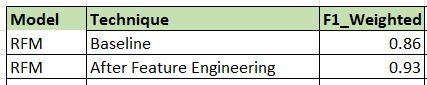

## 3.3: Feature selection

In [ ]:
#********************************************************************************************************************************************************************************
#Selecting features using Feature Selection
#********************************************************************************************************************************************************************************
selector = VarianceThreshold()
X_train_new=selector.fit_transform(a_over)



In [ ]:
#********************************************************************************************************************************************************************************
#Checking for CV Scores
#********************************************************************************************************************************************************************************
train_cross_scores = []

for key, classifier in classifiers.items():
    classifier.fit(X_train_new, b_over['BadCredit'])
    train_score = cross_val_score(classifier, X_train_new, b_over['BadCredit'], cv=5,scoring='f1_weighted')
    train_cross_scores.append(round(train_score.mean(),2))
  
    
print(train_cross_scores)

RandomForestClassifier()

[0.93]


The Score did not improve from feature engineering. Feature Selection was not making much difference. The score is same.

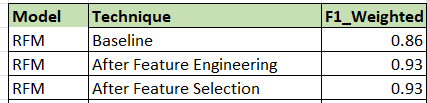

## 3.4: Hyperparameter tuning

In [ ]:
#********************************************************************************************************************************************************************************
#Applying Hypertuning 
#********************************************************************************************************************************************************************************
rfc_params = {'n_estimators':[5],
              'criterion':['gini', 'entropy'],
              'max_depth':[50,None],
              'min_samples_split':[2]}


grid_rfc = GridSearchCV(RandomForestClassifier(), 
                        rfc_params, 
                        cv=5, 
                        scoring='f1_micro').fit(X_train_new, b_over['BadCredit'])

In [ ]:
#********************************************************************************************************************************************************************************
#Checking the best score
#********************************************************************************************************************************************************************************
grid_rfc.best_score_

0.9180519298674795

After Hypertuning, score reduced a bit as the model learnt about the data nicely. Overfitting is avoided.

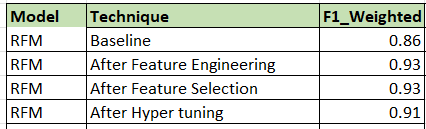

In [ ]:
grid_rfc.best_estimator_

RandomForestClassifier(max_depth=50, n_estimators=5)

In [ ]:
#********************************************************************************************************************************************************************************
#Feature engineering the test variables
#********************************************************************************************************************************************************************************
X_test.DateOfBirth = pd.to_datetime(X_test.DateOfBirth, format='%Y-%m-%d')
X_test['year']  = X_test.DateOfBirth.dt.year
X_test['month'] = X_test.DateOfBirth.dt.month
X_test['day'] = X_test.DateOfBirth.dt.day

def Age(data):
  now = datetime.now().year
  data['Age'] = now- data['year']
  data['Age']=data['Age'].replace([2021],0)
  return data

X_test= Age(X_test)
X_test['DateOfBirth']=X_test['DateOfBirth'].apply(lambda x: x.toordinal())



for x in X_test.columns:
  if X_test[x].dtype == 'object':
    X_test[x]= X_test[x].astype('category')





In [ ]:
X_test = X_test.drop(labels=['UserID','FirstName','LastName','NumberPets','LicensePlate'], axis=1)

In [ ]:
#********************************************************************************************************************************************************************************
#Feature engineering the test variables
#********************************************************************************************************************************************************************************
test_df = pd.concat([X_test,y_test],axis=1)

test_df['age_binned'] = pd.qcut(test_df.Age, q=[0, .25, .50, .75, 1])
test_df['amt_binned'] = pd.qcut(test_df.Amount, q=[0, .25, .50, .75, 1])
test_df['year_binned'] = pd.qcut(test_df.year, q=[0, .25, .50, .75, 1])
test_df['day_binned'] = pd.qcut(test_df.day, q=[0, .25, .50, .75, 1])
test_df['month_binned'] = pd.qcut(test_df.month, q=[0, .25, .50, .75, 1])

test_df.drop(columns=['Age', 'Amount', 'year','day','month'], inplace=True)

test_df['Age']= le.fit_transform(test_df['age_binned'])
test_df['amount']= le.fit_transform(test_df['amt_binned'])
test_df['year']= le.fit_transform(test_df['year_binned'])
test_df['day']= le.fit_transform(test_df['day_binned'])
test_df['month']= le.fit_transform(test_df['month_binned'])

test_df.drop(columns=['age_binned','amt_binned','year_binned','day_binned','month_binned'],inplace=True)

In [ ]:
#********************************************************************************************************************************************************************************
#Converting it to DataFrame
#********************************************************************************************************************************************************************************
y_b_test = pd.to_numeric(y_test)


In [ ]:
#********************************************************************************************************************************************************************************
#Label Encoding the test features
#********************************************************************************************************************************************************************************
test_df['Sex']= le.fit_transform(test_df['Sex'])
test_df['City']= le.fit_transform(test_df['City'])
test_df['Purpose']= le.fit_transform(test_df['Purpose'])
test_df['Street']= le.fit_transform(test_df['Street'])

In [ ]:
#********************************************************************************************************************************************************************************
#More Feature enginnering
#********************************************************************************************************************************************************************************
Scaled = pd.DataFrame(RobustScaler().fit_transform(test_df), columns=test_df.columns)

c = Scaled.loc[:, Scaled.columns != 'BadCredit']
d = Scaled.loc[:, Scaled.columns == 'BadCredit']

c_over,d_over = oversample.fit_resample(c,d)

X_test_new=selector.fit_transform(c_over)



In [ ]:
#********************************************************************************************************************************************************************************
#Predicting on the test data
#********************************************************************************************************************************************************************************
y_pred = grid_rfc.predict(X_test_new)

## 3.5: Performance estimation

In [ ]:
#********************************************************************************************************************************************************************************
#Measuring the performance
#********************************************************************************************************************************************************************************
print('RFM Test test set Accuracy: ', metrics.accuracy_score(d_over, y_pred))
print('RFM test set F1 score: ', metrics.f1_score(d_over, y_pred,average='weighted'))
print('RFM test set classification report: ')
print(classification_report(d_over, y_pred))




RFM Test test set Accuracy:  0.8728557013118062
RFM test set F1 score:  0.8728551834530285
RFM test set classification report: 
              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87       991
         1.0       0.87      0.87      0.87       991

    accuracy                           0.87      1982
   macro avg       0.87      0.87      0.87      1982
weighted avg       0.87      0.87      0.87      1982



Finally, when testing set is applied. the weighted average F1 score is 0.87.

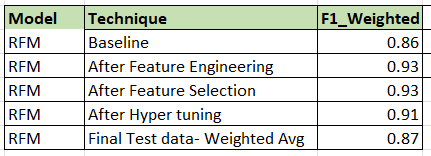

(<Figure size 576x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f20ac4f1ad0>)

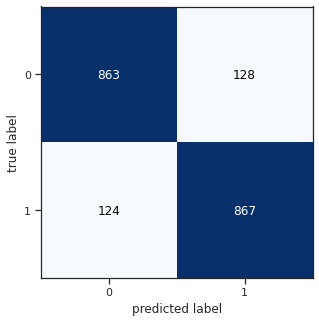

In [ ]:
#********************************************************************************************************************************************************************************
#Plotting the confusion matrix
#********************************************************************************************************************************************************************************
cm_rfm = confusion_matrix(d_over['BadCredit'], y_pred.flatten())
plot_confusion_matrix(cm_rfm)
plt.show()

Our Model has predicted as below⁉
The Data Cleansing, feature engineering, Feature Selection, balancing the dataset and Hypertuning the parameters helped us avoid bias and overfitting. In Risk perspective, we should be more careful in reducing the False negative numbers. RFM model has given a decent number for False Negative.

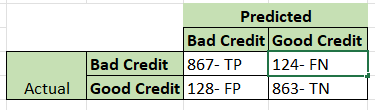